# E-tivity 3: Clustering and Manifold Learning

**Student:** Egberto Linhares Leal

In this e-tivity you will be introduced to standard techniques for unsupervised ML used also for EDA. These include the k-Means clustering algorithm and manifold-learning techniques, such as multi-dimensional scaling (MSD) and t-SNE. The goal of this exercise is to practice these techniques for discovering and visualising hidden patterns in data.

At the end of this e-tivity you should be able to:
- apply a clustering algorithm for partitioning a data set into clusters of similar examples
- use a manifold-learning technique to visualise a clustered data set with 3 or more numerical attributes as a 2D scatter plot
- summarise in words the results of a clustering algorithm

## A. Importing required modules and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#### Load the dataset

In [2]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 17)


## B. Data Exploration

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0,0.000000,1.084523,1.058140,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086
1,1,0.333333,0.925883,1.047319,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711
2,2,0.000000,0.683858,0.635920,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189
3,3,0.000000,0.608992,1.002824,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012
4,4,0.000000,1.101869,1.115650,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305


In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
609,609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708
610,610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496
611,611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075
612,612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256
613,613,0.000000,0.925883,1.074155,0.750,0.0,0,0,0,0,1,0,0,1,0,0,0.663523


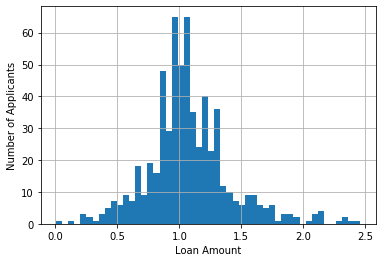

In [5]:
# Next, we examine a histogram of the numerical attribute loanAmount

df['LoanAmount'].hist(bins=50)
plt.xlabel("Loan Amount")
plt.ylabel('Number of Applicants')
plt.show()

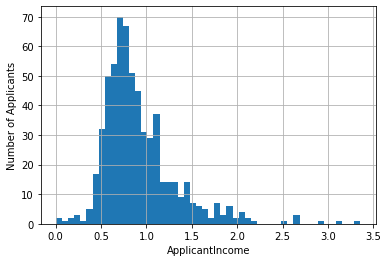

In [6]:
# Next, we examine a histogram of the numerical attribute ApplicantIncome

df['ApplicantIncome'].hist(bins=50)
plt.xlabel("ApplicantIncome")
plt.ylabel('Number of Applicants')
plt.show()

### C. Rescale the Data

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### D. Scatterplot Function (to be used below for visualising a clustering)

In [8]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple', 'blue'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### E. K-Means Clustering

Determine the optmial K

In [9]:
Sum_of_squared_distances = []
Num_K = range(1,10)
for k in Num_K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

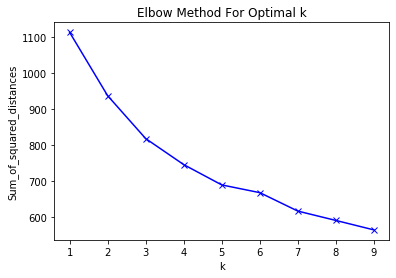

In [10]:
plt.plot(Num_K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Number of clusters $k$.

In [11]:
# Elbow looks on 4 or 5
k = 4

#### Run k-Means

In [12]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

### F. Apply a manifold-learning technique to project the data set to a 2D space

Append the cluster centers to the dataset.

In [13]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### F1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [14]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


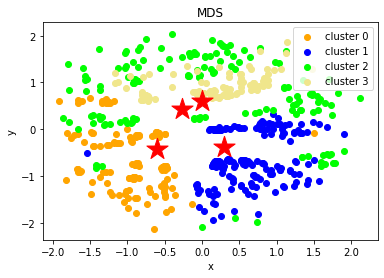

In [15]:
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

#### F2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [16]:
# Project both the data and the k-Means cluster centers to 2D.
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


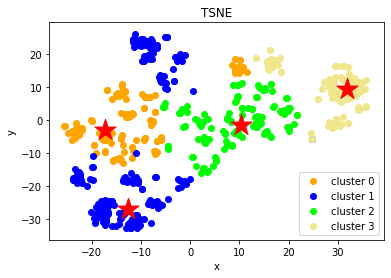

In [17]:
# Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

### G. Cluster Analysis

#### Add the cluster labels as an extra column in the original dataframe

In [18]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [19]:
df.head()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
0,0,0.000000,1.084523,1.058140,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.841086,3
1,1,0.333333,0.925883,1.047319,0.75,1.0,1,0,1,0,0,0,0,0,0,0,0.871711,2
2,2,0.000000,0.683858,0.635920,0.75,1.0,1,0,1,0,1,0,0,0,1,1,0.385189,3
3,3,0.000000,0.608992,1.002824,0.75,1.0,1,0,1,0,0,0,1,0,1,1,0.717012,3
4,4,0.000000,1.101869,1.115650,0.75,1.0,1,0,0,0,0,0,0,0,1,1,0.860305,3


In [20]:
df.tail()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster
609,609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708,0
610,610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496,1
611,611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075,3
612,612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256,3
613,613,0.000000,0.925883,1.074155,0.750,0.0,0,0,0,0,1,0,0,1,0,0,0.663523,0


In [21]:
# Compute the mean value of each attribute for each cluster
df.groupby('cluster').mean()

,Unnamed: 0,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,,
0,329.585714,0.090476,0.901366,0.988768,0.735000,0.935714,0.478571,0.014286,0.000000,0.014286,0.142857,0.064286,0.221429,0.557143,0.121429,0.807143,0.768745
1,324.579710,0.322061,0.924632,1.128813,0.714251,0.985507,0.879227,0.019324,1.000000,0.000000,0.154589,0.043478,0.193237,0.652174,0.000000,0.932367,0.915538
2,297.105960,0.258278,0.895491,1.087794,0.718046,0.496689,0.847682,0.033113,0.655629,0.000000,0.125828,0.046358,0.291391,0.132450,0.456954,0.000000,0.862360
3,258.603448,0.293103,0.948069,1.072860,0.679526,0.991379,0.965517,0.017241,0.793103,0.008621,0.094828,0.060345,0.163793,0.000000,1.000000,1.000000,0.882173
